In [1]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import mysql.connector

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="UypX743+",
  database="crime"
)

print(mydb)

In [4]:
cursur = mydb.cursor()

In [5]:
query = "SELECT *FROM crime"

In [6]:
cursur.execute(query)

In [7]:
data  = cursur.fetchall()

In [8]:
data

[(1001,
  'Burglary',
  'Shenzhen',
  '2024-01-01',
  '00:00',
  63,
  30,
  'Unknown',
  27.49080238,
  103.7026586),
 (1002,
  'Fraud',
  'Wuhan',
  '2024-01-01',
  '00:01',
  47,
  59,
  'Unknown',
  39.01428613,
  110.8380189),
 (1003,
  'Burglary',
  'Beijing',
  '2024-01-01',
  '00:02',
  57,
  20,
  'Unknown',
  34.63987884,
  117.4589167),
 (1004,
  'Assault',
  'Chongqing',
  '2024-01-02',
  '00:04',
  35,
  26,
  'Knife',
  31.97316968,
  114.6444977),
 (1005,
  'Assault',
  'Shenzhen',
  '2024-01-02',
  '00:05',
  68,
  29,
  'None',
  23.12037281,
  116.131223),
 (1006,
  'Theft',
  'Guangzhou',
  '2024-01-02',
  '00:07',
  65,
  40,
  'Gun',
  23.11989041,
  113.1756673),
 (1007,
  'Vandalism',
  'Shenzhen',
  '2024-01-03',
  '00:08',
  19,
  31,
  'Knife',
  21.16167224,
  113.8455313),
 (1008,
  'Burglary',
  'Chongqing',
  '2024-01-03',
  '00:10',
  49,
  50,
  'Knife',
  37.32352292,
  116.983913),
 (1009,
  'Theft',
  'Chongqing',
  '2024-01-03',
  '00:11',
  25,
  35

In [9]:
column_names = [i[0] for i in cursur.description]

In [10]:
column_names

['Crime_ID',
 'Crime_Type',
 'Location',
 'Date',
 'Time',
 'Victim_Age',
 'Suspect_Age',
 'Weapon_Used',
 'Latitude',
 'Longitude']

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(data,columns=column_names)

In [13]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Unknown,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Unknown,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Unknown,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,None,23.120373,116.131223
...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Unknown,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Unknown,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,None,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,None,39.004747,101.141094


In [14]:
cursur.close()
mydb.close()

In [15]:
df.isnull().sum()

Crime_ID       0
Crime_Type     0
Location       0
Date           0
Time           0
Victim_Age     0
Suspect_Age    0
Weapon_Used    0
Latitude       0
Longitude      0
dtype: int64

In [16]:
df.Crime_Type.value_counts()

Burglary     213
Theft        209
Fraud        203
Vandalism    200
Assault      175
Name: Crime_Type, dtype: int64

In [17]:
df.Location.value_counts()

Beijing      147
Guangzhou    139
Chengdu      129
Shanghai     122
Xi'an        118
Wuhan        117
Chongqing    116
Shenzhen     112
Name: Location, dtype: int64

In [18]:
df.Weapon_Used.value_counts()

Knife      232
Unknown    211
None       198
Bat        193
Gun        166
Name: Weapon_Used, dtype: int64

In [19]:
df['Weapon_Used'] = df['Weapon_Used'].replace("Unknown","Miscellaneous")

In [20]:
df['Weapon_Used'] = df['Weapon_Used'].replace("None","No Weapon")

In [21]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223
...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094


In [22]:
df.duplicated().sum()

0

In [23]:
df.Location.value_counts()

Beijing      147
Guangzhou    139
Chengdu      129
Shanghai     122
Xi'an        118
Wuhan        117
Chongqing    116
Shenzhen     112
Name: Location, dtype: int64

In [24]:
# crime rate
totalcrimes = df.shape[0]
totalcrimes

1000

In [25]:
crime_count = df.Location.value_counts()

In [26]:
crime_rate = (crime_count/totalcrimes) *100

In [27]:
crime_rate

Beijing      14.7
Guangzhou    13.9
Chengdu      12.9
Shanghai     12.2
Xi'an        11.8
Wuhan        11.7
Chongqing    11.6
Shenzhen     11.2
Name: Location, dtype: float64

In [28]:
#Most Frequent Crime Types
df.Crime_Type.value_counts()

Burglary     213
Theft        209
Fraud        203
Vandalism    200
Assault      175
Name: Crime_Type, dtype: int64

In [29]:
import datetime as dt

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [31]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223
...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094


In [32]:
df['Month'] = df['Date'].dt.month

In [33]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude,Month
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659,1
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019,1
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917,1
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498,1
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103,12
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292,12
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160,12
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094,12


In [34]:
crimes_per_month = df['Month'].value_counts().sort_index()
print("Crimes per Month:")
print(crimes_per_month)


Crimes per Month:
1     85
2     80
3     85
4     82
5     85
6     82
7     84
8     85
9     82
10    85
11    82
12    83
Name: Month, dtype: int64


In [35]:
import matplotlib.pyplot as plt

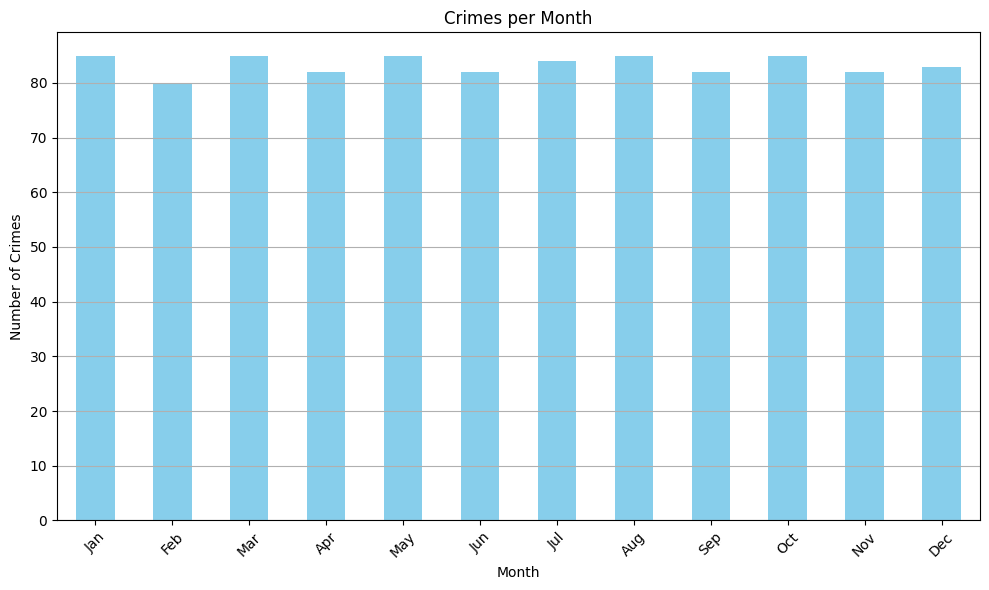

In [36]:
plt.figure(figsize=(10, 6))
crimes_per_month.plot(kind='bar', color='skyblue')
plt.title('Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Crimes per Season:
Spring    252
Summer    251
Fall      249
Winter    248
Name: Season, dtype: int64


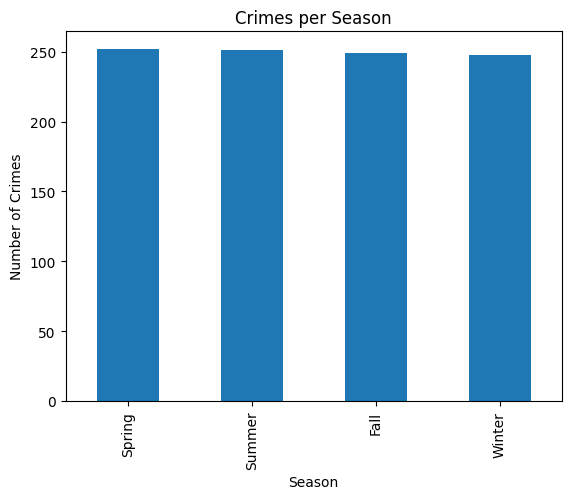

In [37]:
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df['Season'] = df['Month'].map(season_mapping)

crimes_per_season = df['Season'].value_counts()
print("\nCrimes per Season:")
print(crimes_per_season)

crimes_per_season.plot(kind='bar', title='Crimes per Season')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.show()

Crimes by Age Group:
Age_Group
0-18       0
19-25    116
26-35    213
36-45    189
46-60    289
61+      193
dtype: int64


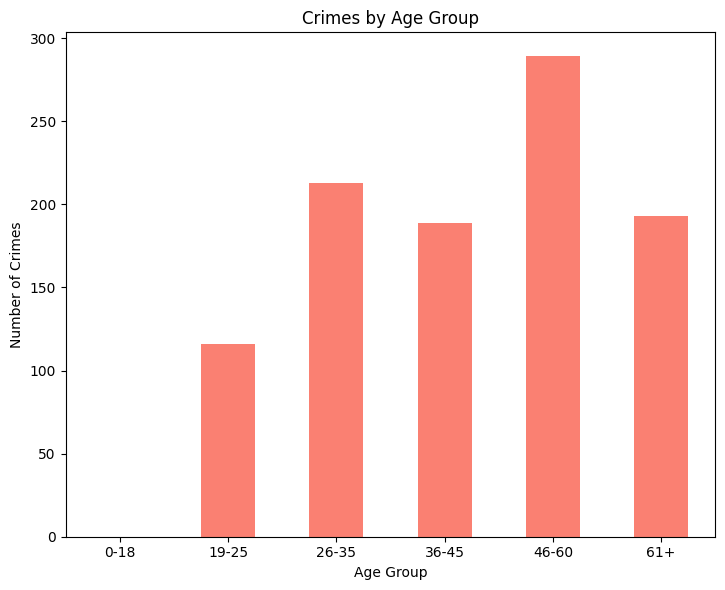

In [38]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '61+']
df['Age_Group'] = pd.cut(df['Victim_Age'], bins=bins, labels=labels, right=False)
crime_counts_by_age = df.groupby('Age_Group').size()
print("Crimes by Age Group:")
print(crime_counts_by_age)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
crime_counts_by_age.plot(kind='bar', color='salmon')
plt.title('Crimes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [39]:
!pip install geopandas folium

Defaulting to user installation because normal site-packages is not writeable


In [40]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

print(gdf)

     Crime_ID Crime_Type   Location       Date   Time  Victim_Age  \
0        1001   Burglary   Shenzhen 2024-01-01  00:00          63   
1        1002      Fraud      Wuhan 2024-01-01  00:01          47   
2        1003   Burglary    Beijing 2024-01-01  00:02          57   
3        1004    Assault  Chongqing 2024-01-02  00:04          35   
4        1005    Assault   Shenzhen 2024-01-02  00:05          68   
..        ...        ...        ...        ...    ...         ...   
995      1996      Fraud    Chengdu 2024-12-29  23:53          18   
996      1997  Vandalism      Xi'an 2024-12-29  23:54          37   
997      1998    Assault  Guangzhou 2024-12-30  23:56          39   
998      1999      Fraud  Guangzhou 2024-12-30  23:57          65   
999      2000   Burglary    Chengdu 2024-12-31  23:59          28   

     Suspect_Age    Weapon_Used   Latitude   Longitude  Month  Season  \
0             30  Miscellaneous  27.490802  103.702659      1  Winter   
1             59  Miscell

In [41]:
crime_rate

Beijing      14.7
Guangzhou    13.9
Chengdu      12.9
Shanghai     12.2
Xi'an        11.8
Wuhan        11.7
Chongqing    11.6
Shenzhen     11.2
Name: Location, dtype: float64

In [42]:
# crime rate
totalcrimes = df.shape[0]
totalcrimes

1000

In [43]:
crime_count = df.Location.value_counts()
crime_rate = (crime_count/totalcrimes) *100

In [44]:
import folium

m = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Crime_Type'],
        icon=folium.Icon(color='blue' if row['Crime_Type'] == 'Theft' else 'red')
    ).add_to(m)

m.save("crime_map.html")
m


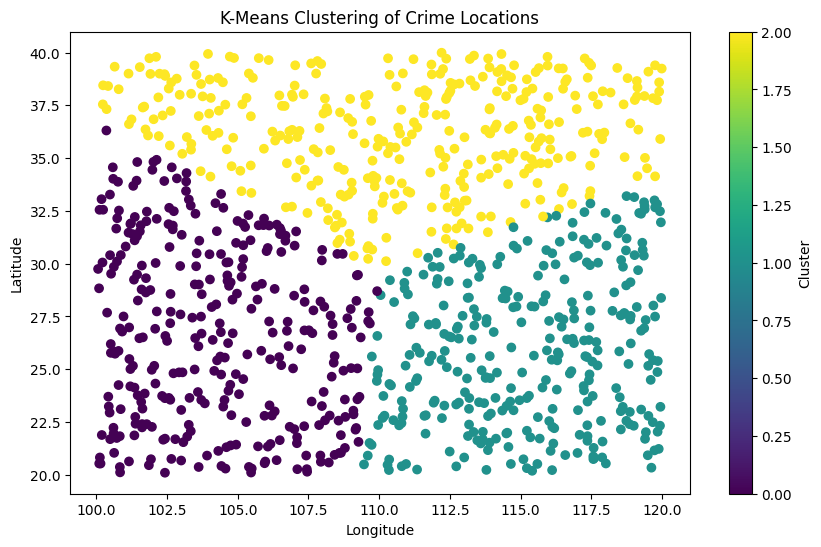

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
X = df[['Latitude', 'Longitude']]

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


In [46]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [47]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude,Month,Season,Age_Group,Cluster
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659,1,Winter,61+,0
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019,1,Winter,46-60,2
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917,1,Winter,46-60,2
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498,1,Winter,36-45,2
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223,1,Winter,61+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103,12,Winter,19-25,1
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292,12,Winter,36-45,2
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160,12,Winter,36-45,0
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094,12,Winter,61+,2


In [48]:
crime_counts = df.groupby('Date').size().reset_index(name='Crime_Counts')

In [49]:
crime_counts

,Date,Crime_Counts
0,2024-01-01,3
1,2024-01-02,3
2,2024-01-03,3
3,2024-01-04,2
4,2024-01-05,3
...,...,...
361,2024-12-27,2
362,2024-12-28,3
363,2024-12-29,3
364,2024-12-30,2


Importing plotly failed. Interactive plots will not work.
18:10:08 - cmdstanpy - INFO - Chain [1] start processing
18:10:08 - cmdstanpy - INFO - Chain [1] done processing


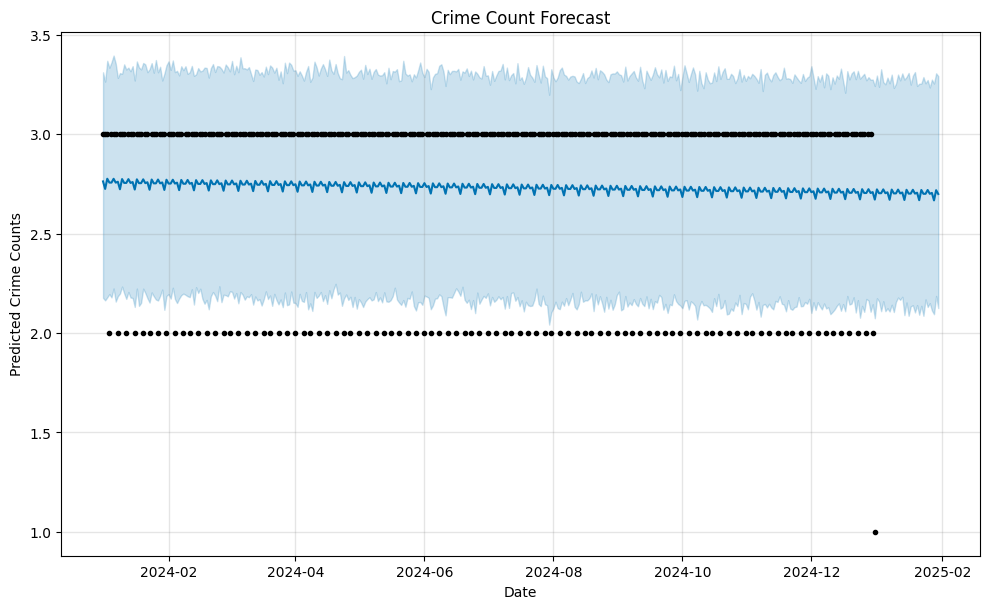

In [50]:
from prophet import Prophet
crime_counts.rename(columns={'Date': 'ds', 'Crime_Counts': 'y'}, inplace=True)


model = Prophet()
model.fit(crime_counts)


future = model.make_future_dataframe(periods=30)  
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Crime Count Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Crime Counts')
plt.show()

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is your dataset with the following columns:
# ['Crime_Type', 'Location', 'Date', 'Time', 'Victim_Age', 'Suspect_Age', 'Weapon_Used', 'Latitude', 'Longitude', 'Month', 'Season', 'Age_Group']

# Drop unnecessary columns for classification
df_cleaned = df.drop(columns=['Date', 'Time', 'Latitude', 'Longitude', 'Season', 'Age_Group'])

# Encoding categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['Location', 'Weapon_Used', 'Month'], drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['Crime_Type'])  # Features
y = df_encoded['Crime_Type']  # Target variable


In [52]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [54]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 7  7  9  5  9]
 [ 5 11 10  8  7]
 [ 8 11  5 11  8]
 [ 6 17  7  9  6]
 [ 3 11  9  4  7]]

Classification Report:
              precision    recall  f1-score   support

     Assault       0.24      0.19      0.21        37
    Burglary       0.19      0.27      0.22        41
       Fraud       0.12      0.12      0.12        43
       Theft       0.24      0.20      0.22        45
   Vandalism       0.19      0.21      0.20        34

    accuracy                           0.20       200
   macro avg       0.20      0.20      0.19       200
weighted avg       0.20      0.20      0.19       200



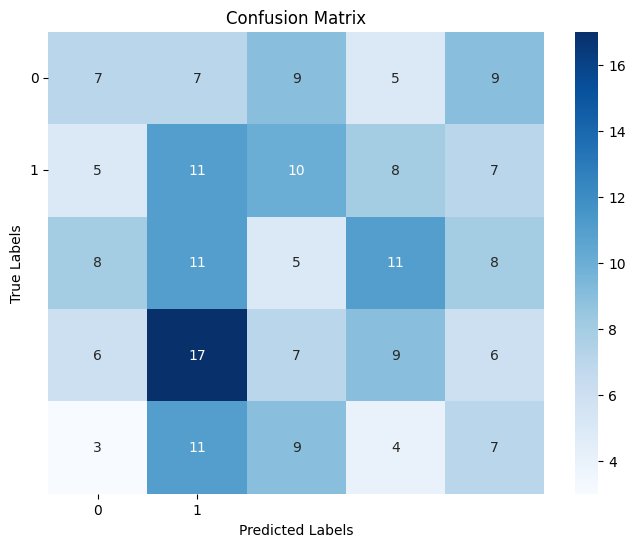

In [59]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], rotation=0)
plt.yticks(ticks=[0.5, 1.5], rotation=0)
plt.show()